In [1]:
!conda env list

# conda environments:
#
base                     /home/samuel/anaconda3
py374                 *  /home/samuel/anaconda3/envs/py374



In [2]:
# set up
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim
seed = 1
seed_data = 10

import os
import sys
import ot 
import torch 

# Set wd
print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/spa/seq-posterior-approx-w-nf-dev/')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/')

sys.path.append('./')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
import util.mmd as mmd

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev


In [3]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


In [4]:
# set width to full screen
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# set style
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [5]:
def read_posterior_samples(path):
    return np.loadtxt(path, delimiter=",")


def calc_emd(ref_data_set, data_set, p = 2):
    
    # from https://pythonot.github.io/quickstart.html#optimal-transport-and-wasserstein-distance
    
    n = ref_data_set.shape[0]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    
    if p == 2:
        
        M = ot.dist(ref_data_set, data_set)
    
        return np.sqrt(ot.emd2(a, b, M))
    
    elif p == 1:
        
        M = ot.dist(ref_data_set, data_set, metric='euclidean')
    
        return ot.emd2(a, b, M)

    
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

In [6]:
seed_max = 10
nbr_rounds = 5
seed_data = 10

## Read results 

In [7]:
smcabc_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/abcsmc_' + id_job + '.txt'
    smcabc_res[:,i] = read_res_file(p)

In [8]:
snl_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    if i != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
        p = 'two_moons/results/snl_' + id_job + '.txt'
        snl_res[:,i] = read_res_file(p)

In [9]:
snpe_c_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/snpe_c_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [10]:
snre_b_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'two_moons/results/snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

In [11]:
spa_flow_res = np.zeros((2,seed_max))

for i in range(seed_max):
    p = 'two_moons/results/spa_flow_' + str(dim) + '_' + str(i+1) + '.txt'
    spa_flow_res[:,i] = read_res_file(p)

Runtime (training) (sec)

In [12]:
print("SMC-ABC: " + str(smcabc_res[0,:].mean().round(4)))
print("SNL: " + str(snl_res[0,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[0,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[0,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[0,:].mean().round(4)))

SMC-ABC: 0.5083
SNL: 1817.7382
SNPE-C: 394.4378
SNRE-B: 669.6964
SPA-Flow: 168.0871


Runtime (inference, i.e. gen. 1000 samples from the res. posterior) (sec)

In [13]:
print("SMC-ABC: " + str(smcabc_res[1,:].mean().round(4)))
print("SNL: " + str(snl_res[1,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[1,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[1,:].mean().round(4)))
print("SPA-Flow: " + str(spa_flow_res[1,:].mean().round(4)))


SMC-ABC: 0.0002
SNL: 202.7862
SNPE-C: 0.0203
SNRE-B: 69.2051
SPA-Flow: 0.0248


### Load posterior samples 

In [14]:
p = 'two_moons/data/true_posterior_' + str(dim)  + '_' + str(1) + '.csv'
analytical_post = read_posterior_samples(p)

In [15]:
smcabc_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    smcabc_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
            p = 'two_moons/data/abcsmc_posterior_' + str(i+1) + "_"+ id_job + '.csv'
            smcabc_post_round_i.append(read_posterior_samples(p))
            
    smcabc_post.append(smcabc_post_round_i)

In [16]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snl_post_round_i = []
    for j in range(seed_max):
        if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
            id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
            p = 'two_moons/data/snl_posterior_' + str(i+1) + "_"+ id_job + '.csv'
            snl_post_round_i.append(read_posterior_samples(p))
            
    snl_post.append(snl_post_round_i)
        

In [17]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/snpe_c_posterior_' + str(i+1) + "_"+ id_job + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [18]:
snre_b_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snre_b_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/snre_b_posterior_' + str(i+1) + "_"+ id_job + '.csv'
        snre_b_post_round_i.append(read_posterior_samples(p))
            
    snre_b_post.append(snre_b_post_round_i)

In [19]:
spa_flow_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    spa_flow_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1)
        p = 'two_moons/data/spa_flow_posterior_' + str(i+1) + "_" + id_job + '.csv'
        spa_flow_post_round_i.append(read_posterior_samples(p))
            
    spa_flow_post.append(spa_flow_post_round_i)

### Load post pred samples

In [20]:
p = 'two_moons/data/true_post_pred_' + str(dim)  + '_' + str(1) + '.csv'
analytical_post_pred = read_posterior_samples(p)

In [21]:
snl_post_pred = [] # here we only have the post pred for the last iteration
for j in range(seed_max):
    if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/snl_post_pred_' + id_job + '.csv'
        snl_post_pred.append(read_posterior_samples(p))
            

In [22]:
spa_flow_post_pred = [] # posterior rped samples are stored in spa_flow_post_pred[round][seed]

for i in range(nbr_rounds):
    spa_flow_post_pred_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = 'two_moons/data/spa_flow_post_pred_' + str(i+1) + "_"+ str(dim) + '_' + str(j+1) + '.csv'
        spa_flow_post_pred_round_i.append(read_posterior_samples(p))
            
    spa_flow_post_pred.append(spa_flow_post_pred_round_i)

## Calc emd for each approx posterior and plot posteriors

In [23]:
power = 1

In [24]:
smcabc_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        smcabc_post_emd[i,j] = calc_emd(analytical_post,smcabc_post[i][j], power)


0
1
2
3
4


In [25]:
snl_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snl_post_emd[i,j] = calc_emd(analytical_post,snl_post[i][j], power)
    
    

0
1
2
3
4


In [26]:
snpe_c_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snpe_c_post_emd[i,j] = calc_emd(analytical_post,snpe_c_post[i][j], power)         
        #snpe_c_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpe_c_post[i][j])).item()         


0
1
2
3
4


In [27]:
snre_b_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        snre_b_post_emd[i,j] = calc_emd(analytical_post,snre_b_post[i][j], power)         
        #snpe_c_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(snpe_c_post[i][j])).item()         


0
1
2
3
4


In [28]:
spa_flow_post_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        spa_flow_post_emd[i,j] = calc_emd(analytical_post,spa_flow_post[i][j], power)         
        #spa_flow_post_emd[i,j] = mmd.compute_mmd(torch.from_numpy(analytical_post),torch.from_numpy(spa_flow_post[i][j])).item()         


0
1
2
3
4


In [29]:
print("SMC-ABC: " + str(smcabc_post_emd.mean(axis=1).round(4)))
print("SNL: " + str(snl_post_emd.mean(axis=1).round(4)))
print("SNPE-C: " + str(snpe_c_post_emd.mean(axis=1).round(4)))
print("SNRE-B: " + str(snre_b_post_emd.mean(axis=1).round(4)))
print("SPA-Flow: " + str(spa_flow_post_emd.mean(axis=1).round(4)))

SMC-ABC: [0.4016 0.3537 0.3665 0.3659 0.3575]
SNL: [1.1636 1.2685 1.2958 1.2876 1.5547]
SNPE-C: [0.2761 0.2338 0.209  0.1915 0.1802]
SNRE-B: [1.0935 1.1908 1.0767 1.0368 1.3568]
SPA-Flow: [0.3581 0.4179 0.3971 0.3474 0.4759]


#### Plotting - estimated Wasserstien dist 

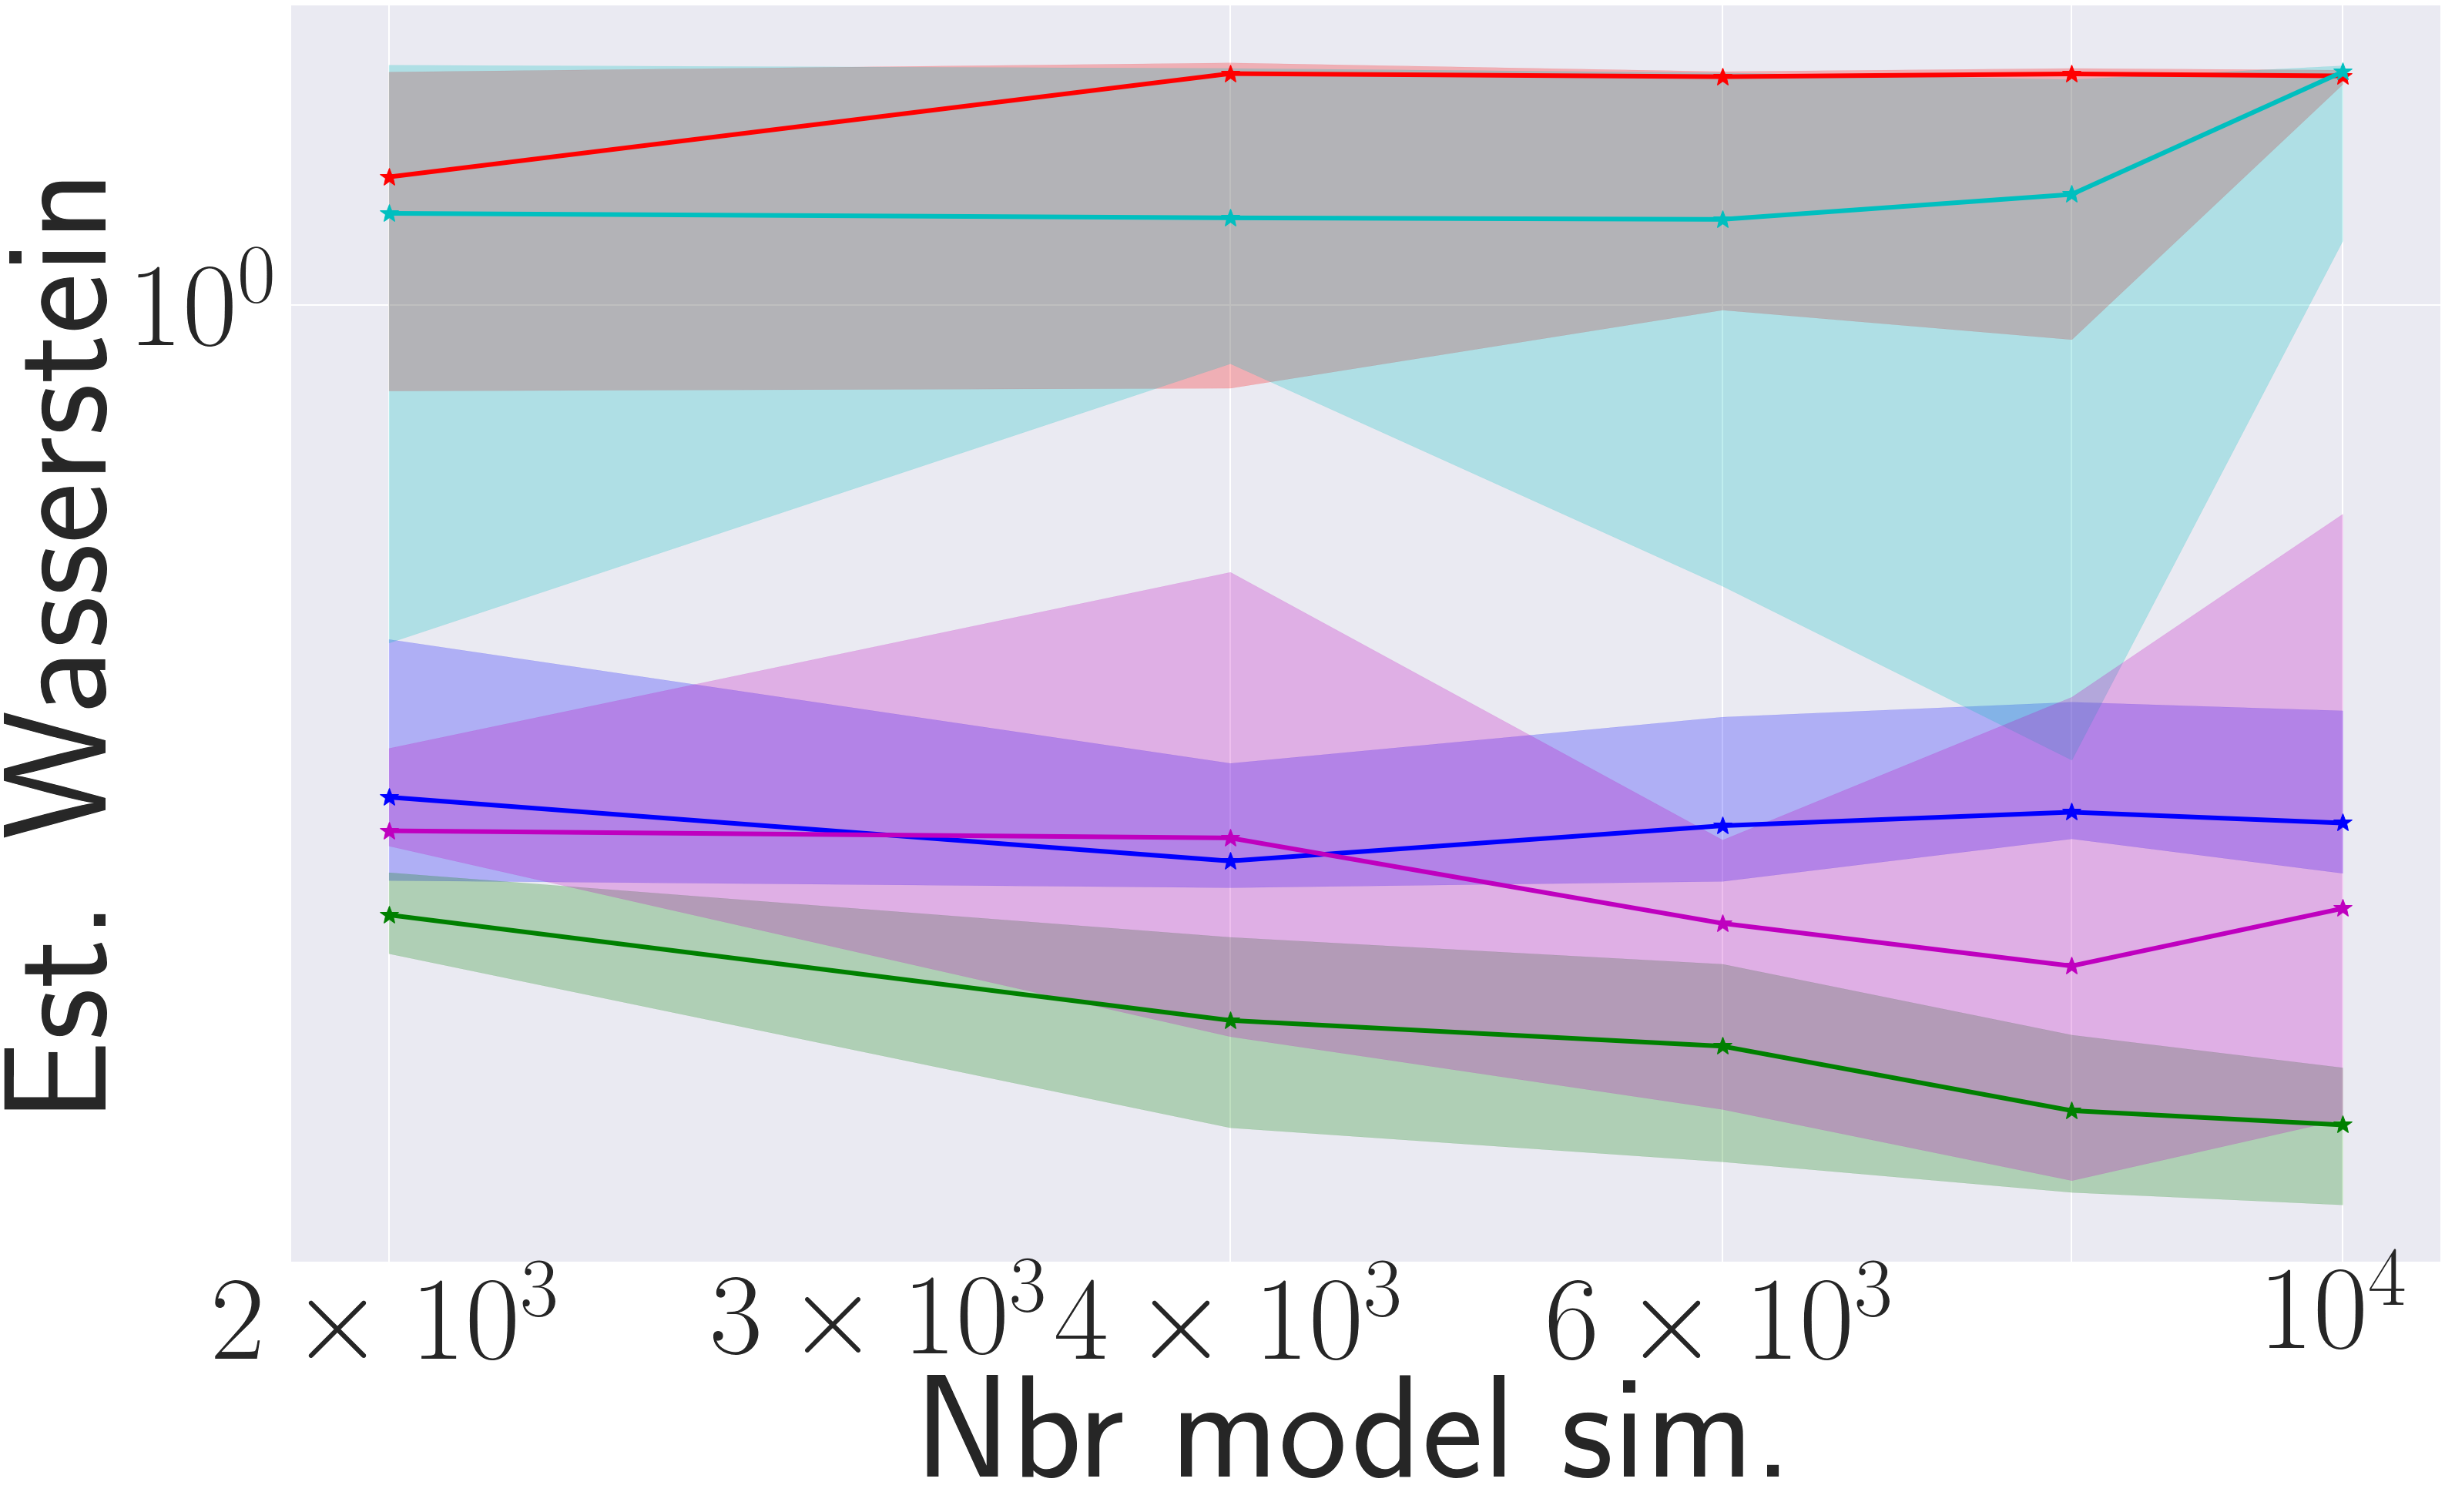

In [60]:
x = [2000,4000,6000,8000,10000]

upper_q = 0.75
lower_q = 0.25

fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)

ax.loglog(x,np.median(smcabc_post_emd,axis=1), color = "b", marker = "*", 
          label='SMC-ABC', markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(smcabc_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(smcabc_post_emd, [lower_q, upper_q],axis=1)[1,:], 
                 color ="b", alpha = 0.25)


ax.loglog(x,np.median(snl_post_emd,axis=1), color = "r", marker = "*", label='SNL',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snl_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snl_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "r", alpha = 0.25)

ax.loglog(x,np.median(snpe_c_post_emd,axis=1), color = "g", marker = "*", label='SNPE-C',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snpe_c_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snpe_c_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "g", alpha = 0.25)


ax.loglog(x,np.median(snre_b_post_emd,axis=1), color = "c", marker = "*", label='SNRE-B',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(snre_b_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(snre_b_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "c", alpha = 0.25)

ax.loglog(x,np.median(spa_flow_post_emd,axis=1), color = "m", marker = "*", label='SNPLA',
         markersize=25, linewidth=6)
ax.fill_between(x,np.quantile(spa_flow_post_emd, [lower_q, upper_q],axis=1)[0,:],
                 np.quantile(spa_flow_post_emd, [lower_q, upper_q],axis=1)[1,:],
                 color = "m", alpha = 0.25)

#ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.xaxis.set_ticks(np.arange(1, 6, 1))

ax.set_xticks(x)
ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=155)
ax.tick_params(axis='both', which='minor', labelsize=150)
#ax.legend(prop={'size': 90}, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Est. Wasserstein", fontsize=190)
ax.set_xlabel("Nbr model sim.", fontsize=190)

plt.savefig("./two_moons/fig/post_est_emd.pdf", bbox_inches='tight')


In [44]:
spa_flow_post_emd_wo_failes = []

for i in range(nbr_rounds):
    spa_flow_post_emd_wo_failes.append(spa_flow_post_emd[i,np.where(spa_flow_post_emd[i,:] < 1)].mean().round(4))
    
print("SPA-Flow (without cases that failed): " + str(spa_flow_post_emd_wo_failes))

# why is it not decreasing??

SPA-Flow (without cases that failed): [0.3581, 0.4179, 0.233, 0.2744, 0.3625]


In [45]:
sum(snl_post_emd[4,:]>3)

0

In [46]:
sum(spa_flow_post_emd[4,:]>3)

0

(0, 5)

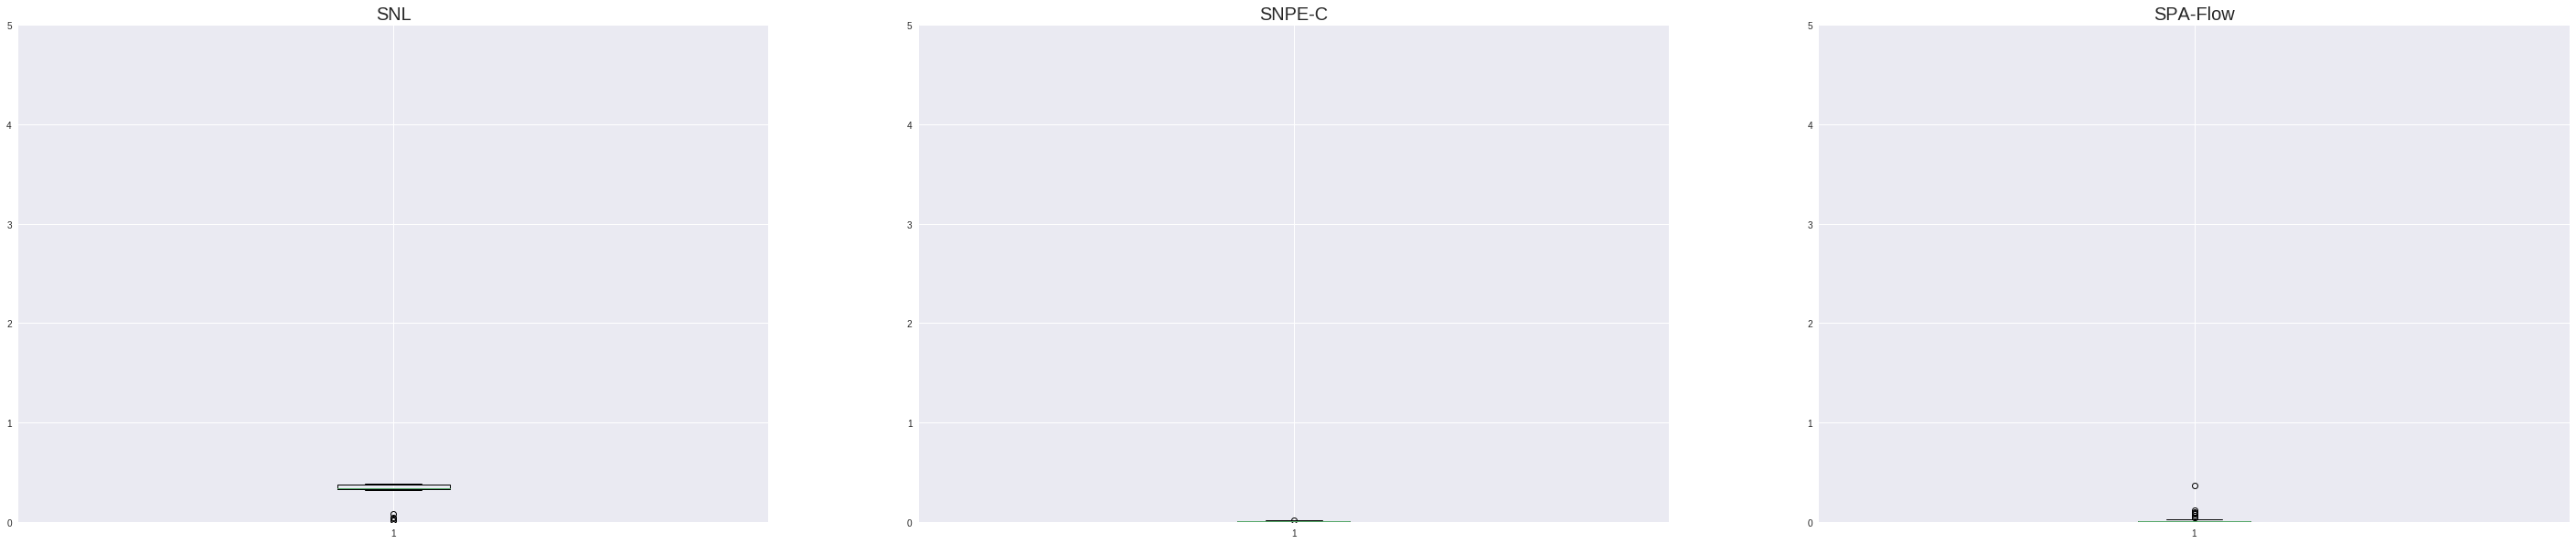

In [24]:
# deprecated
r = 5 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snl_post_emd[r-1,:])
ax2.boxplot(snpe_c_post_emd[r-1,:])
ax3.boxplot(spa_flow_post_emd[r-1,:])


ax1.set_title("SNL",fontsize=20)
ax2.set_title("SNPE-C",fontsize=20)
ax3.set_title("SPA-Flow",fontsize=20)

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([0,5])

(0, 5)

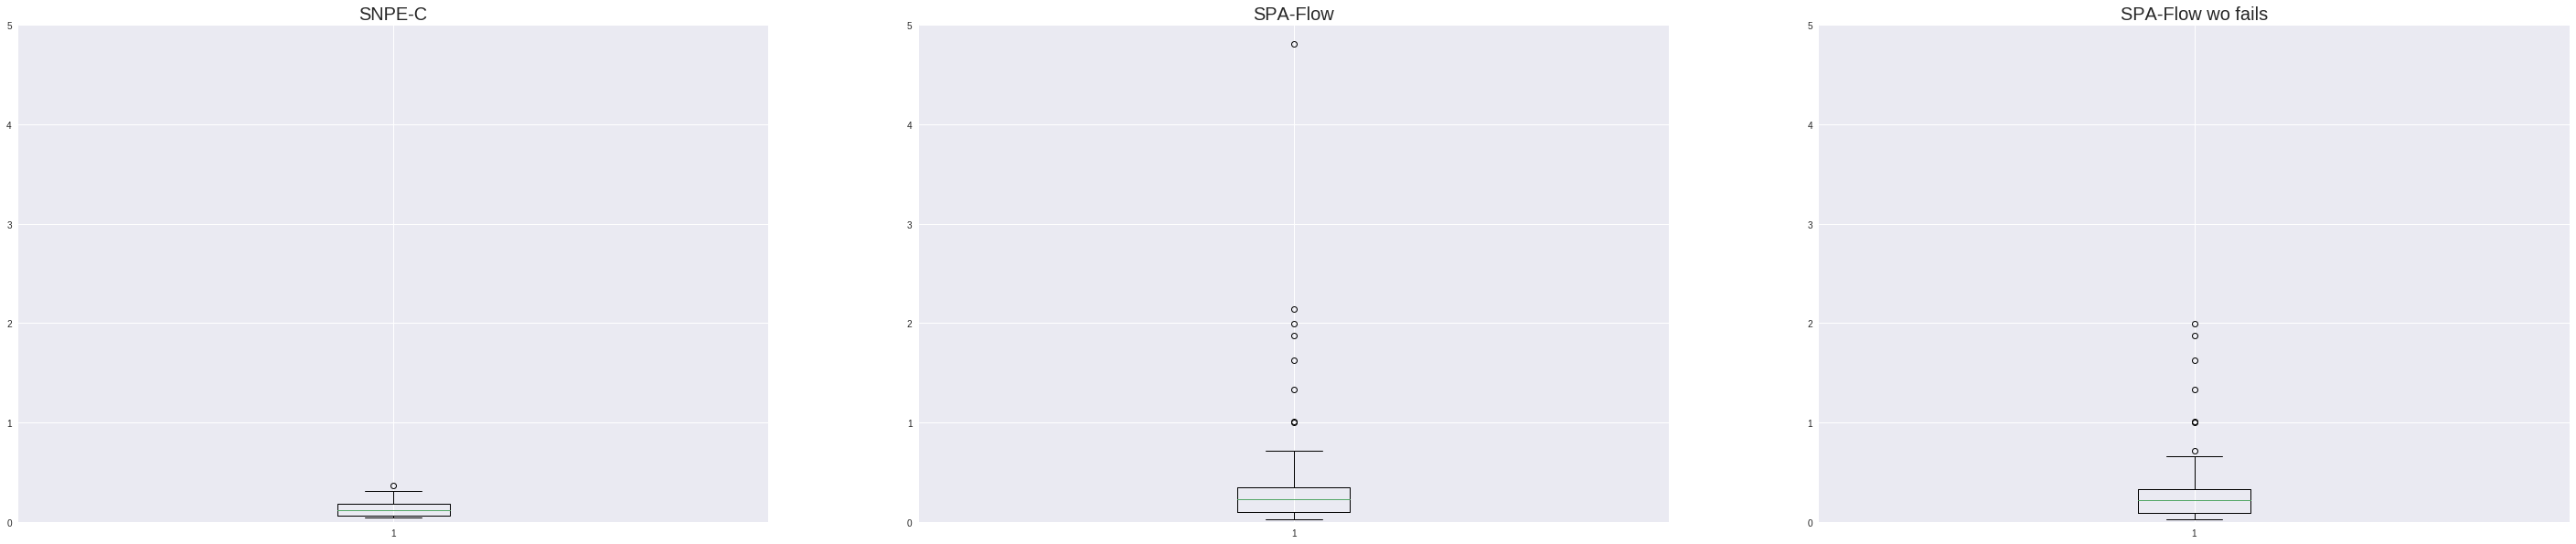

In [44]:
# deprecated

r = 5 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(spa_flow_post_emd[r-1,:])
ax3.boxplot(spa_flow_post_emd[r-1,np.where(spa_flow_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("SPA-Flow",fontsize=20)
ax3.set_title("SPA-Flow wo fails",fontsize=20)

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([0,5])


(0, 3)

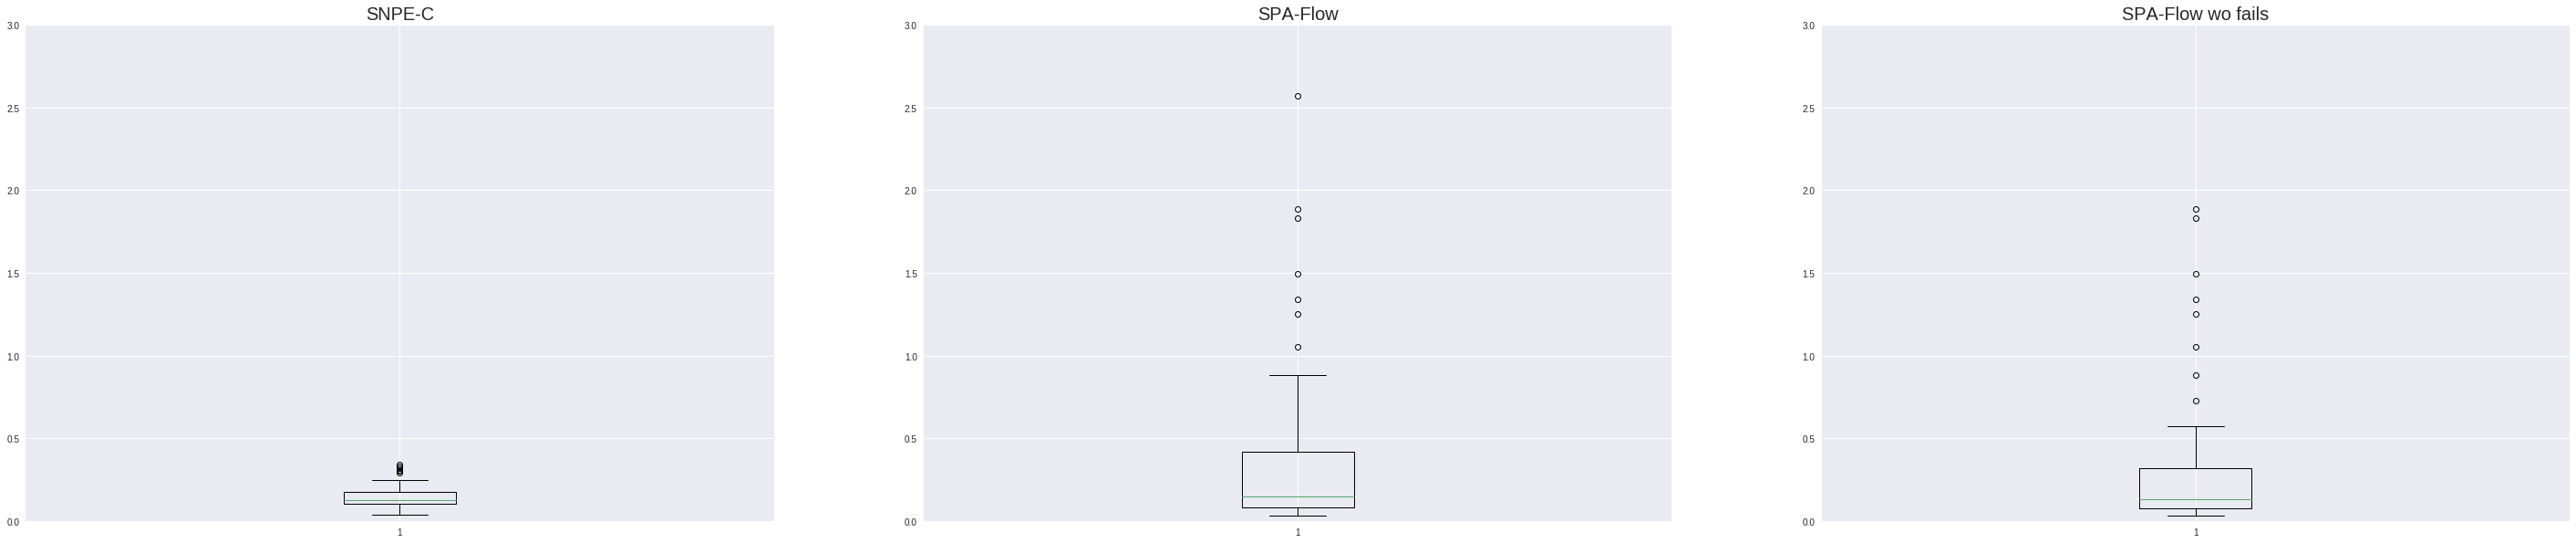

In [46]:
# deprecated

r = 4 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(spa_flow_post_emd[r-1,:])
ax3.boxplot(spa_flow_post_emd[r-1,np.where(spa_flow_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("SPA-Flow",fontsize=20)
ax3.set_title("SPA-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

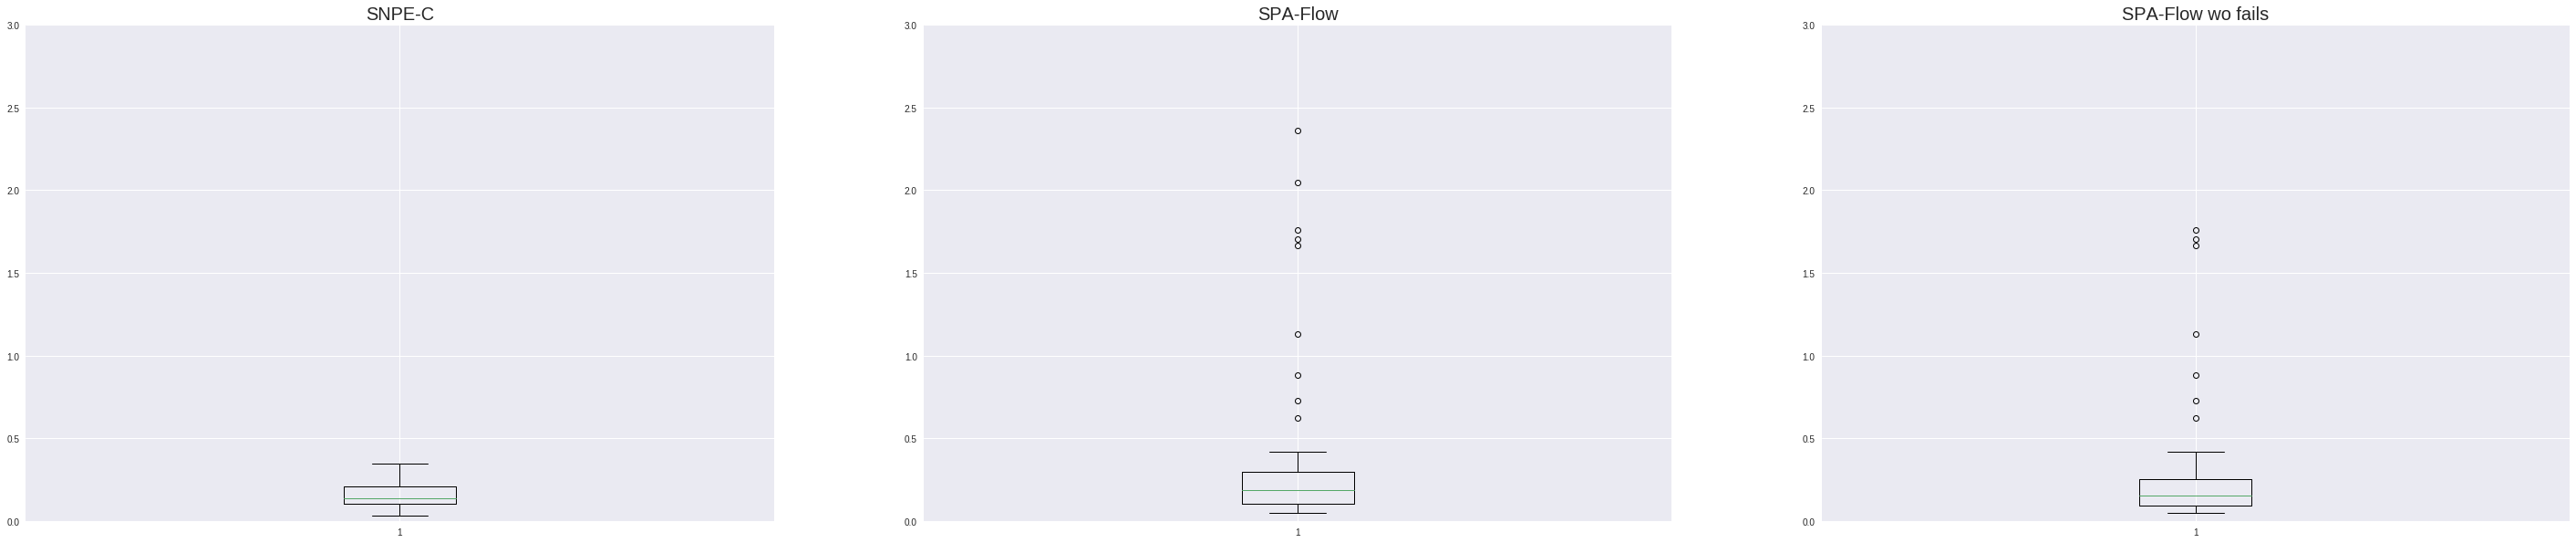

In [47]:

# deprecated

r = 3 # round 

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(spa_flow_post_emd[r-1,:])
ax3.boxplot(spa_flow_post_emd[r-1,np.where(spa_flow_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("SPA-Flow",fontsize=20)
ax3.set_title("SPA-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

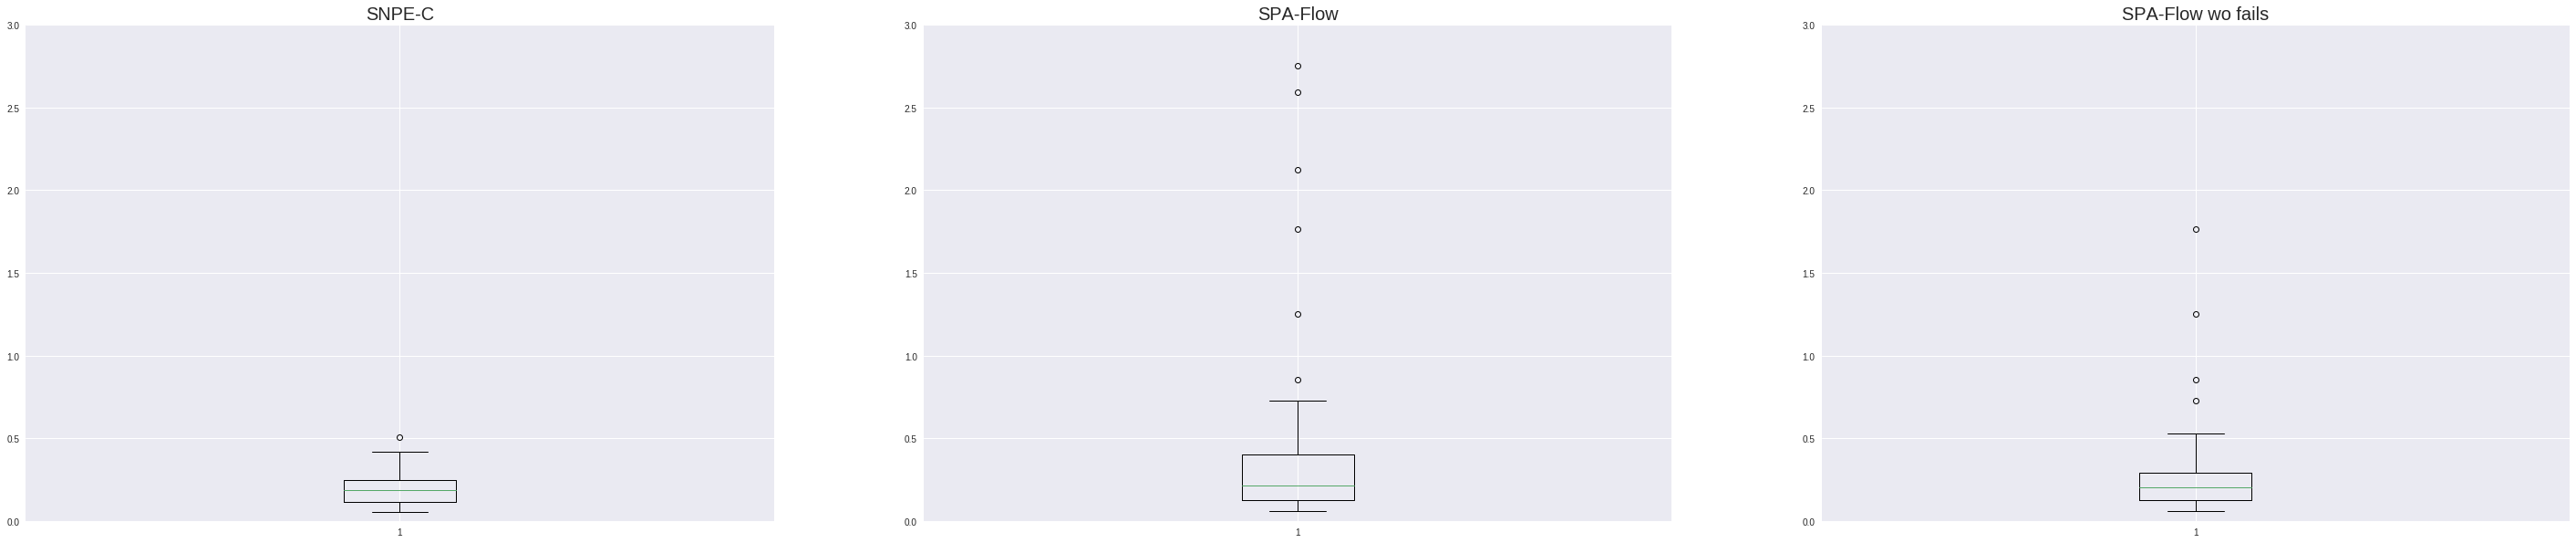

In [48]:
r = 2 # round 
# deprecated

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(spa_flow_post_emd[r-1,:])
ax3.boxplot(spa_flow_post_emd[r-1,np.where(spa_flow_post_emd[r-1,:] < 2)].reshape(-1))


ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("SPA-Flow",fontsize=20)
ax3.set_title("SPA-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

(0, 3)

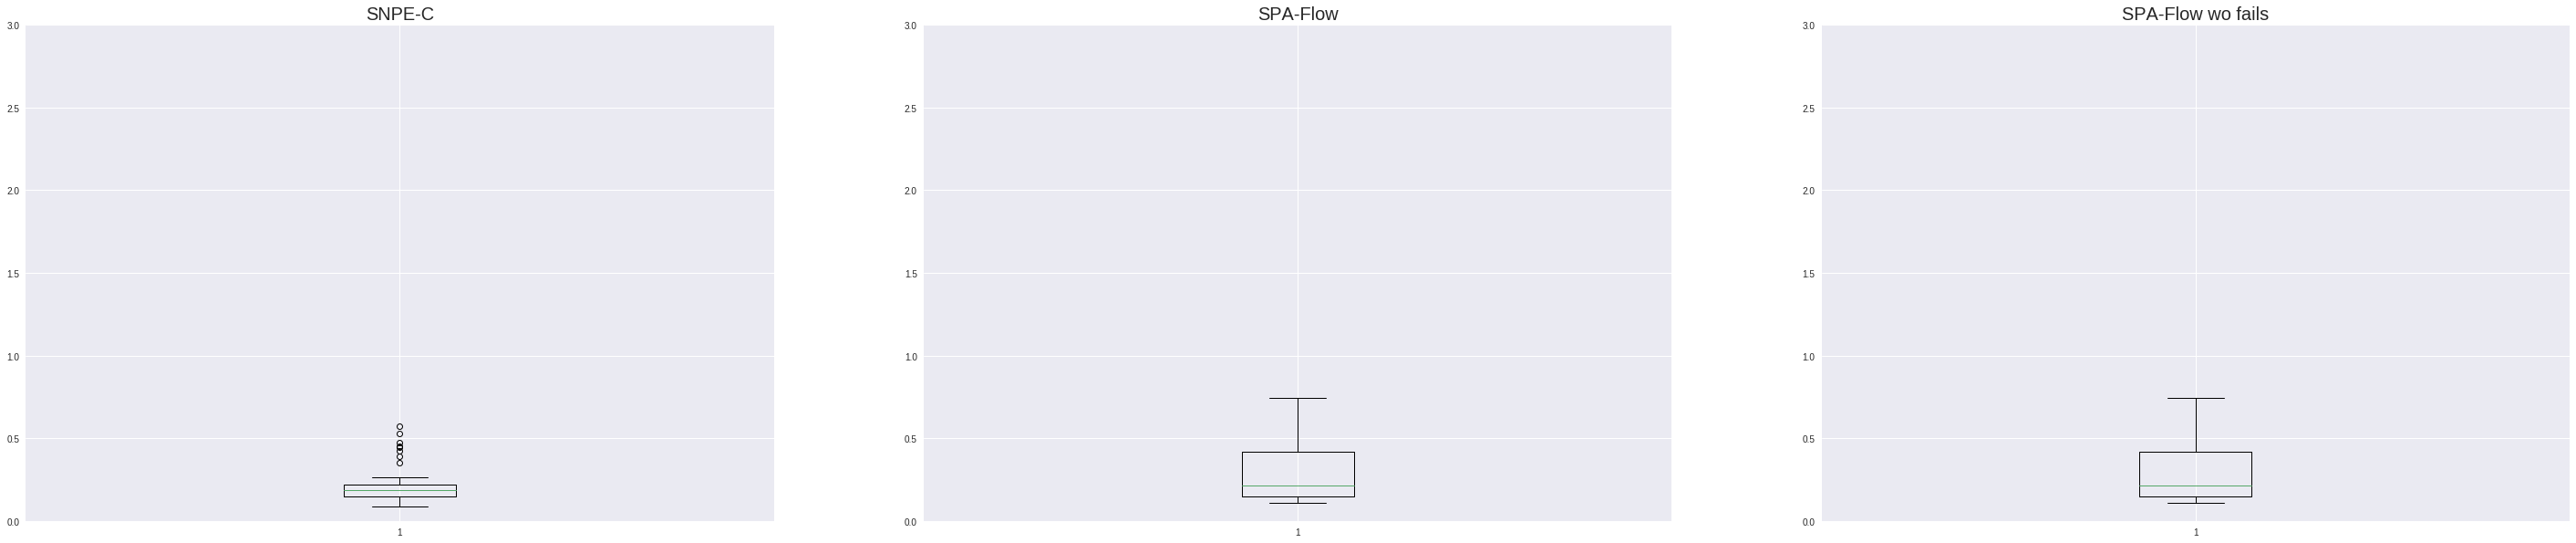

In [49]:
r = 1 # round 
# deprecated

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(snpe_c_post_emd[r-1,:])
ax2.boxplot(spa_flow_post_emd[r-1,:])
ax3.boxplot(spa_flow_post_emd[r-1,np.where(spa_flow_post_emd[r-1,:] < 2)].reshape(-1))

ax1.set_title("SNPE-C",fontsize=20)
ax2.set_title("SPA-Flow",fontsize=20)
ax3.set_title("SPA-Flow wo fails",fontsize=20)

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])

### Plotting - posterior

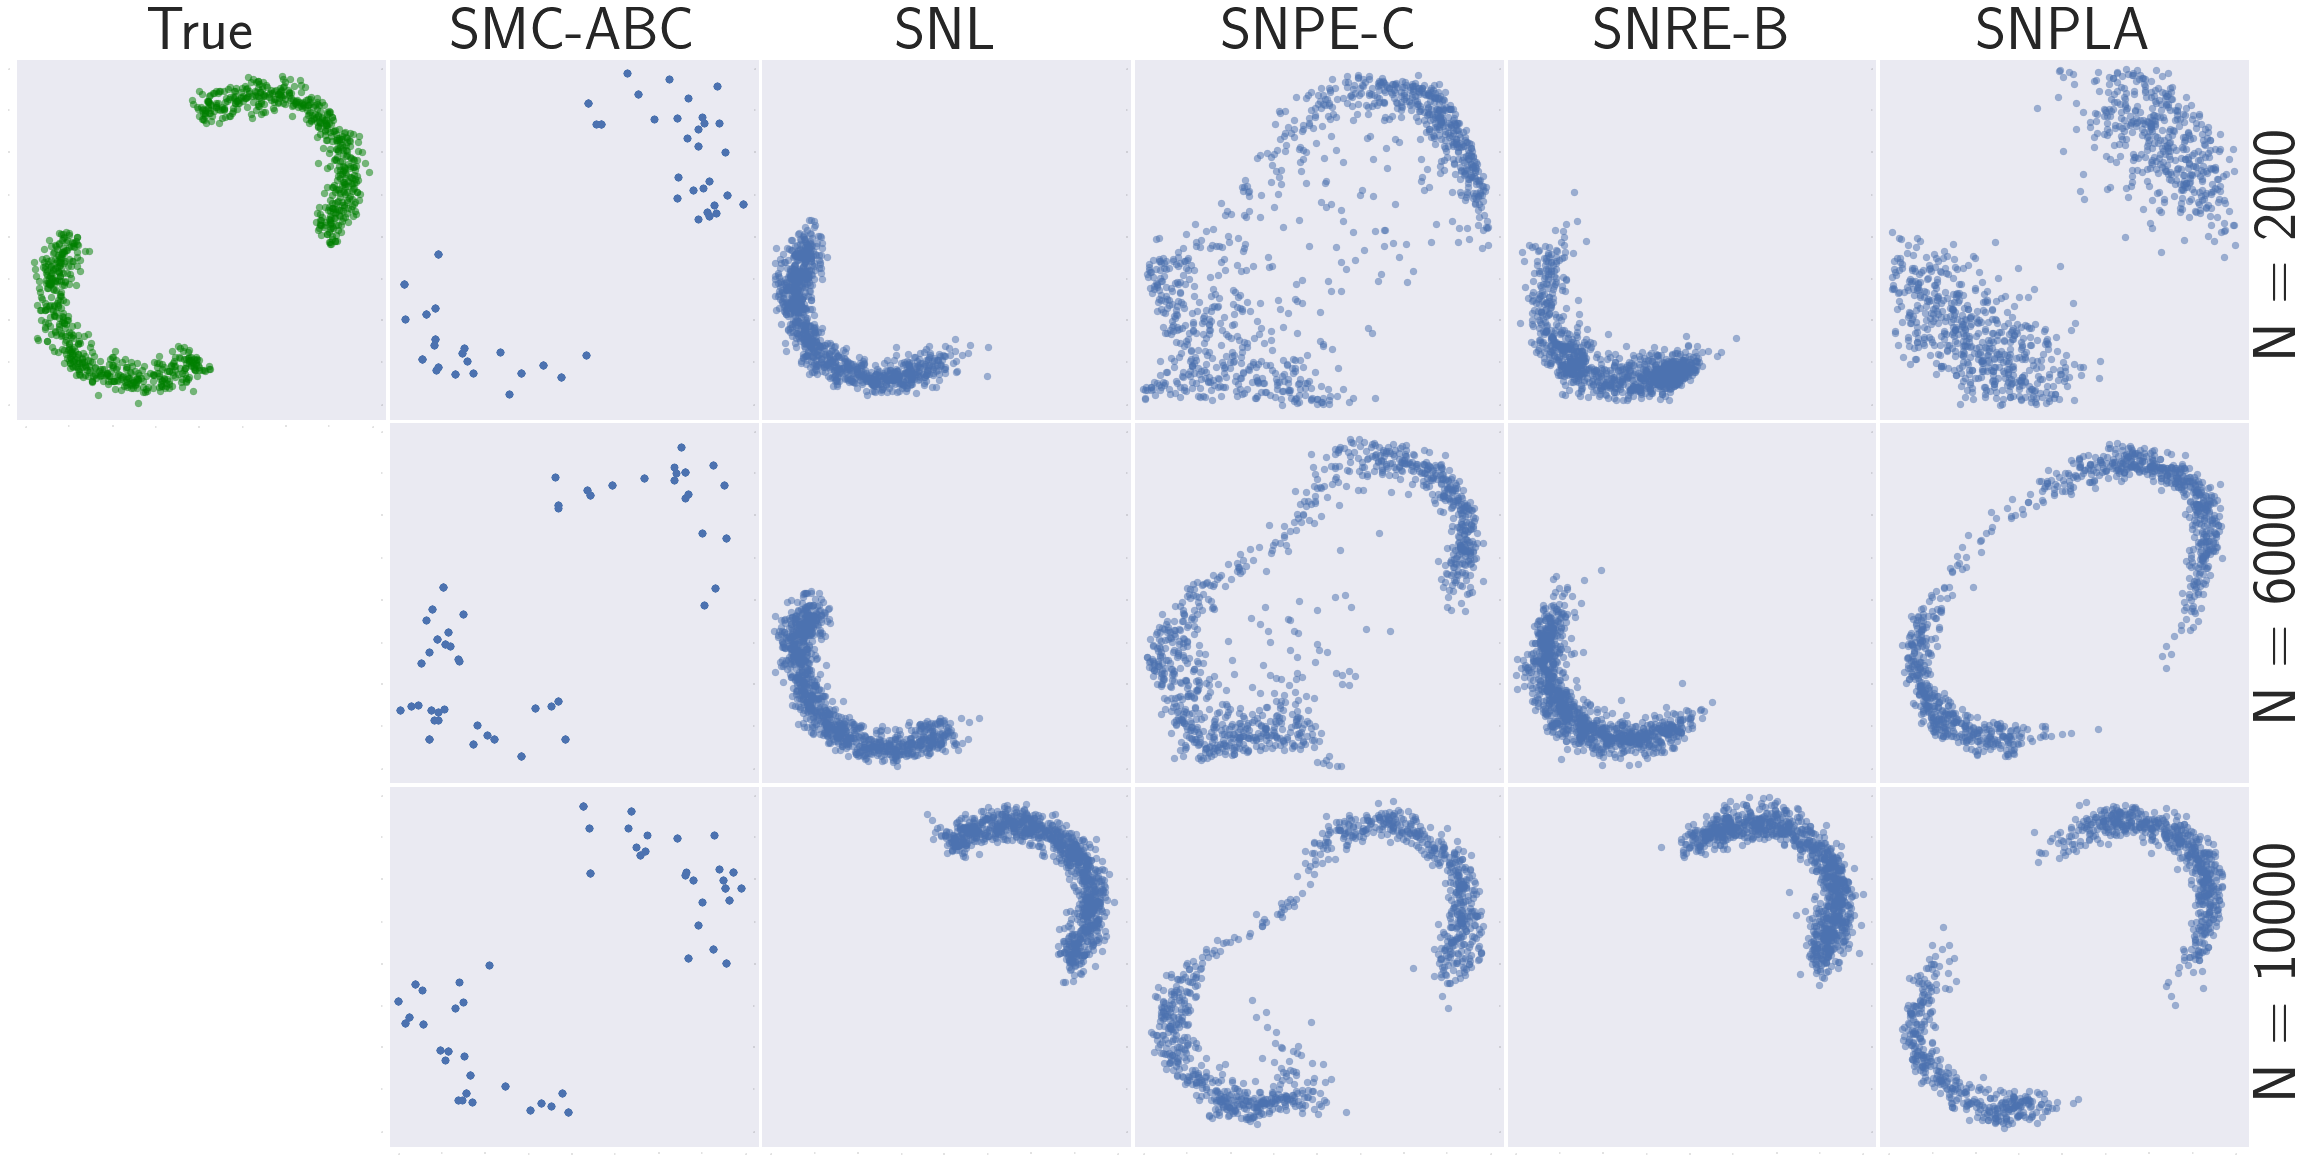

In [32]:
# plotting

import matplotlib.gridspec as gridspec

data_set = 6 # 1 works, 0 does not work..

fig = plt.figure(figsize = (40,20))


# frist row 
ax1 = fig.add_subplot(3, 6, 1)
ax2 = fig.add_subplot(3, 6, 2)
ax3 = fig.add_subplot(3, 6, 3)
ax4 = fig.add_subplot(3, 6, 4)
ax5 = fig.add_subplot(3, 6, 5)
ax6 = fig.add_subplot(3, 6, 6)

ax7 = fig.add_subplot(3, 6, 8)
ax8 = fig.add_subplot(3, 6, 9)
ax9 = fig.add_subplot(3, 6, 10)
ax10 = fig.add_subplot(3, 6, 11)
ax11 = fig.add_subplot(3, 6, 12)

ax12 = fig.add_subplot(3, 6, 14)
ax13 = fig.add_subplot(3, 6, 15)
ax14 = fig.add_subplot(3, 6, 16)
ax15 = fig.add_subplot(3, 6, 17)
ax16 = fig.add_subplot(3, 6, 18)

ax1.scatter(analytical_post[:,0],analytical_post[:,1],color = "g", alpha = 0.5)

ax2.scatter(smcabc_post[0][data_set][:,0],smcabc_post[0][data_set][:,1], alpha = 0.5)
ax3.scatter(snl_post[0][data_set][:,0],snl_post[0][data_set][:,1], alpha = 0.5)
ax4.scatter(snpe_c_post[0][data_set][:,0],snpe_c_post[0][data_set][:,1], alpha = 0.5)
ax5.scatter(snre_b_post[0][data_set][:,0],snre_b_post[0][data_set][:,1], alpha = 0.5)
ax6.scatter(spa_flow_post[0][data_set][:,0],spa_flow_post[0][data_set][:,1], alpha = 0.5)

ax7.scatter(smcabc_post[2][data_set][:,0],smcabc_post[2][data_set][:,1], alpha = 0.5)
ax8.scatter(snl_post[2][data_set][:,0],snl_post[2][data_set][:,1], alpha = 0.5)
ax9.scatter(snpe_c_post[2][data_set][:,0],snpe_c_post[2][data_set][:,1], alpha = 0.5)
ax10.scatter(snre_b_post[2][data_set][:,0],snre_b_post[2][data_set][:,1], alpha = 0.5)
ax11.scatter(spa_flow_post[2][data_set][:,0],spa_flow_post[2][data_set][:,1], alpha = 0.5)

ax12.scatter(smcabc_post[-1][data_set][:,0],smcabc_post[-1][data_set][:,1], alpha = 0.5)
ax13.scatter(snl_post[-1][data_set][:,0],snl_post[-1][data_set][:,1], alpha = 0.5)
ax14.scatter(snpe_c_post[-1][data_set][:,0],snpe_c_post[-1][data_set][:,1], alpha = 0.5)
ax15.scatter(snre_b_post[-1][data_set][:,0],snre_b_post[-1][data_set][:,1], alpha = 0.5)
ax16.scatter(spa_flow_post[-1][data_set][:,0],spa_flow_post[-1][data_set][:,1], alpha = 0.5)

ax1.set_title("True",fontsize=60)
ax2.set_title("SMC-ABC",fontsize=60)
ax3.set_title("SNL",fontsize=60)
ax4.set_title("SNPE-C",fontsize=60)
ax5.set_title("SNRE-B",fontsize=60)
ax6.set_title("SNPLA",fontsize=60)

ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax7.set_xlim(ax1.get_xlim())
ax7.set_ylim(ax1.get_ylim())

ax8.set_xlim(ax1.get_xlim())
ax8.set_ylim(ax1.get_ylim())

ax9.set_xlim(ax1.get_xlim())
ax9.set_ylim(ax1.get_ylim())

ax10.set_xlim(ax1.get_xlim())
ax10.set_ylim(ax1.get_ylim())

ax11.set_xlim(ax1.get_xlim())
ax11.set_ylim(ax1.get_ylim())

ax12.set_xlim(ax1.get_xlim())
ax12.set_ylim(ax1.get_ylim())

ax13.set_xlim(ax1.get_xlim())
ax13.set_ylim(ax1.get_ylim())

ax14.set_xlim(ax1.get_xlim())
ax14.set_ylim(ax1.get_ylim())

ax15.set_xlim(ax1.get_xlim())
ax15.set_ylim(ax1.get_ylim())

ax16.set_xlim(ax1.get_xlim())
ax16.set_ylim(ax1.get_ylim())

ax6.set_ylabel(r'N = 2000',fontsize=60)
ax6.yaxis.set_label_position("right")

ax11.set_ylabel(r'N = 6000',fontsize=60)
ax11.yaxis.set_label_position("right")

ax16.set_ylabel(r'N = 10000',fontsize=60)
ax16.yaxis.set_label_position("right")

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13 , ax14,
          ax15, ax16]:
    
    ax.tick_params(axis='y', which='major', labelsize=0)
    ax.tick_params(axis='y', which='minor', labelsize=0)

    ax.tick_params(axis='x', which='major', labelsize=0)
    ax.tick_params(axis='x', which='minor', labelsize=0)

    ax.grid(False)
    
fig.subplots_adjust(wspace=0.01, hspace=0.01)

plt.savefig("./two_moons/fig/post_samples_" + str(data_set) + ".pdf", bbox_inches='tight')


Text(0, 0.5, 'N = 10000')

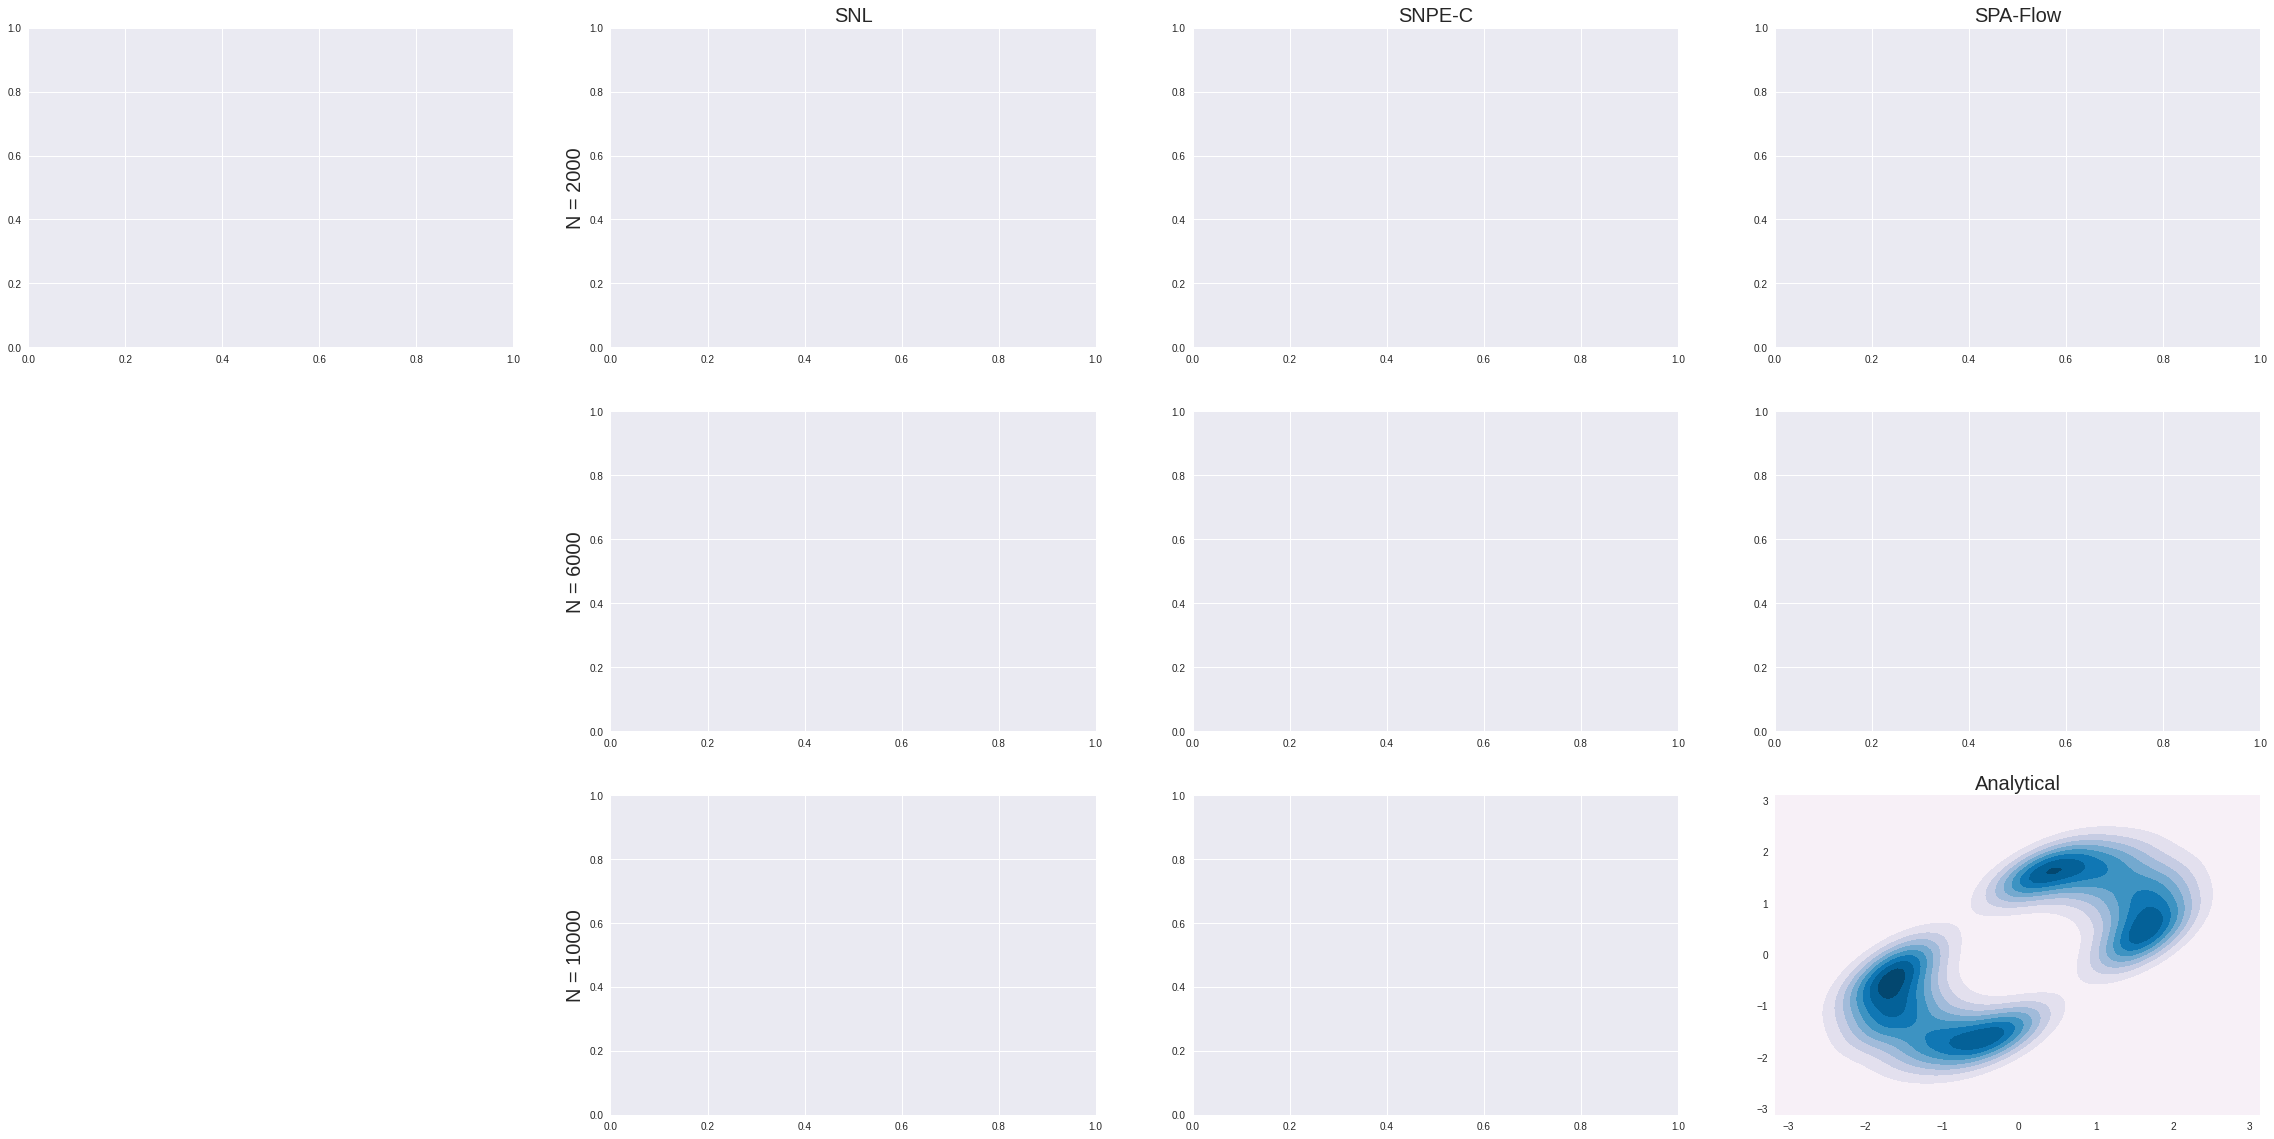

In [85]:
# plotting

data_set = 37 # 1 works, 0 does not work..

fig = plt.figure(figsize = (40,20))

# frist row 
ax1 = fig.add_subplot(3, 4, 1)
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)

ax5 = fig.add_subplot(3, 4, 6)
ax6 = fig.add_subplot(3, 4, 7)
ax7 = fig.add_subplot(3, 4, 8)

ax8 = fig.add_subplot(3, 4, 10)
ax9 = fig.add_subplot(3, 4, 11)
ax10 = fig.add_subplot(3, 4, 12)

ax1=sns.kdeplot(analytical_post, shade = True, cmap = "PuBu")
#ax2=sns.kdeplot(snl_post[0][data_set], shade = True, cmap = "PuBu")
#ax3=sns.kdeplot(snpe_c_post[0][data_set], shade = True, cmap = "PuBu")
#ax4=sns.kdeplot(spa_flow_post[0][data_set], shade = True, cmap = "PuBu")

#ax5=sns.kdeplot(snl_post[2][data_set], shade = True, cmap = "PuBu")
#ax6=sns.kdeplot(snpe_c_post[2][data_set], shade = True, cmap = "PuBu")
#ax7=sns.kdeplot(spa_flow_post[2][data_set], shade = True, cmap = "PuBu")

#ax8=sns.kdeplot(snl_post[4][data_set], shade = True, cmap = "PuBu")
#ax9=sns.kdeplot(snpe_c_post[4][data_set], shade = True, cmap = "PuBu")
#ax10=sns.kdeplot(spa_flow_post[4][data_set], shade = True, cmap = "PuBu")

ax1.set_title("Analytical",fontsize=20)
ax2.set_title("SNL",fontsize=20)
ax3.set_title("SNPE-C",fontsize=20)
ax4.set_title("SPA-Flow",fontsize=20)


ax2.set_ylabel(r'N = 2000',fontsize=20)
ax5.set_ylabel(r'N = 6000',fontsize=20)
ax8.set_ylabel(r'N = 10000',fontsize=20)


In [69]:
import seaborn as sns

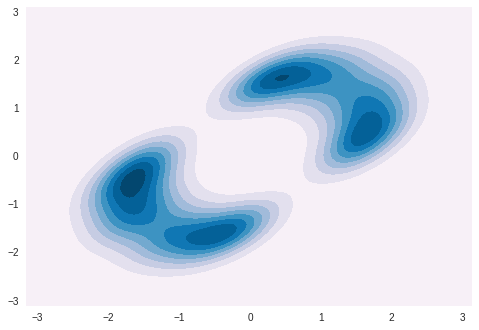

In [81]:
ax = sns.kdeplot(analytical_post, shade = True, cmap = "PuBu")

### Calc emd for post pred and plot post pred

In [33]:
snl_post_pred_emd = np.zeros((seed_max))

for j in range(seed_max):
    snl_post_pred_emd[j] = calc_emd(analytical_post_pred,snl_post_pred[j])     

In [34]:
spa_flow_post_pred_emd = np.zeros((nbr_rounds,seed_max))

for i in range(nbr_rounds):
    print(i)
    for j in range(seed_max):
        spa_flow_post_pred_emd[i,j] = calc_emd(analytical_post_pred,spa_flow_post_pred[i][j])         

0
1
2
3
4


In [36]:
print("SNL: " + str(snl_post_pred_emd.mean().round(4)))
print("SPA-Flow: " + str(spa_flow_post_pred_emd.mean(axis=1).round(4)))


SNL: 0.1195
SPA-Flow: [0.2316 0.2068 0.1543 0.1245 0.1169]


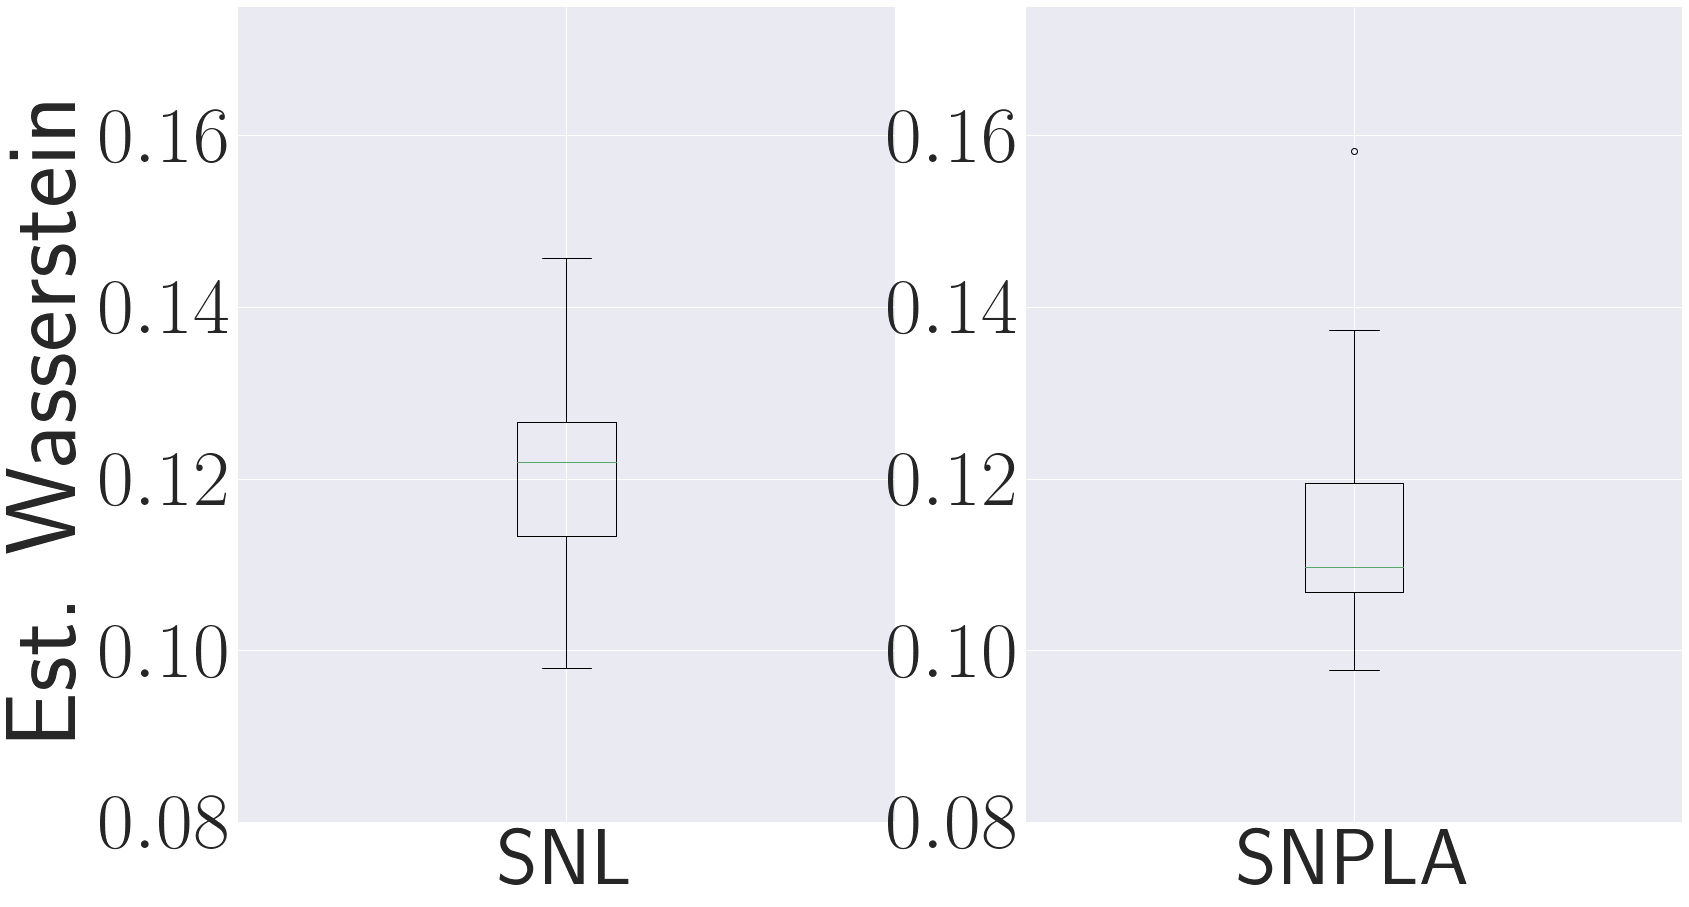

In [54]:
r = 5 # round 

fig = plt.figure(figsize = (40,15))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

ax1.boxplot(snl_post_pred_emd[:], labels = ["SNL"])
ax2.boxplot(spa_flow_post_pred_emd[r-1,:], labels = ["SNPLA"])

#ax1.set_title("SNL",fontsize=60)
#ax2.set_title("SNPLA",fontsize=60)

ax1.set_ylim([0.08,0.175])
ax2.set_ylim([0.08,0.175])

ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_ylabel("Est. Wasserstein", fontsize=100)


plt.savefig("./two_moons/fig/post_pred_emd_" + str(data_set) + "_.pdf",bbox_inches='tight')



In [63]:
np.quantile(snl_post_pred_emd[:], [0.5, 0.25, 0.75]).round(3)

array([0.122, 0.113, 0.127])

In [64]:
np.quantile(spa_flow_post_pred_emd[r-1,:], [0.5, 0.25, 0.75]).round(3)

array([0.11 , 0.107, 0.119])

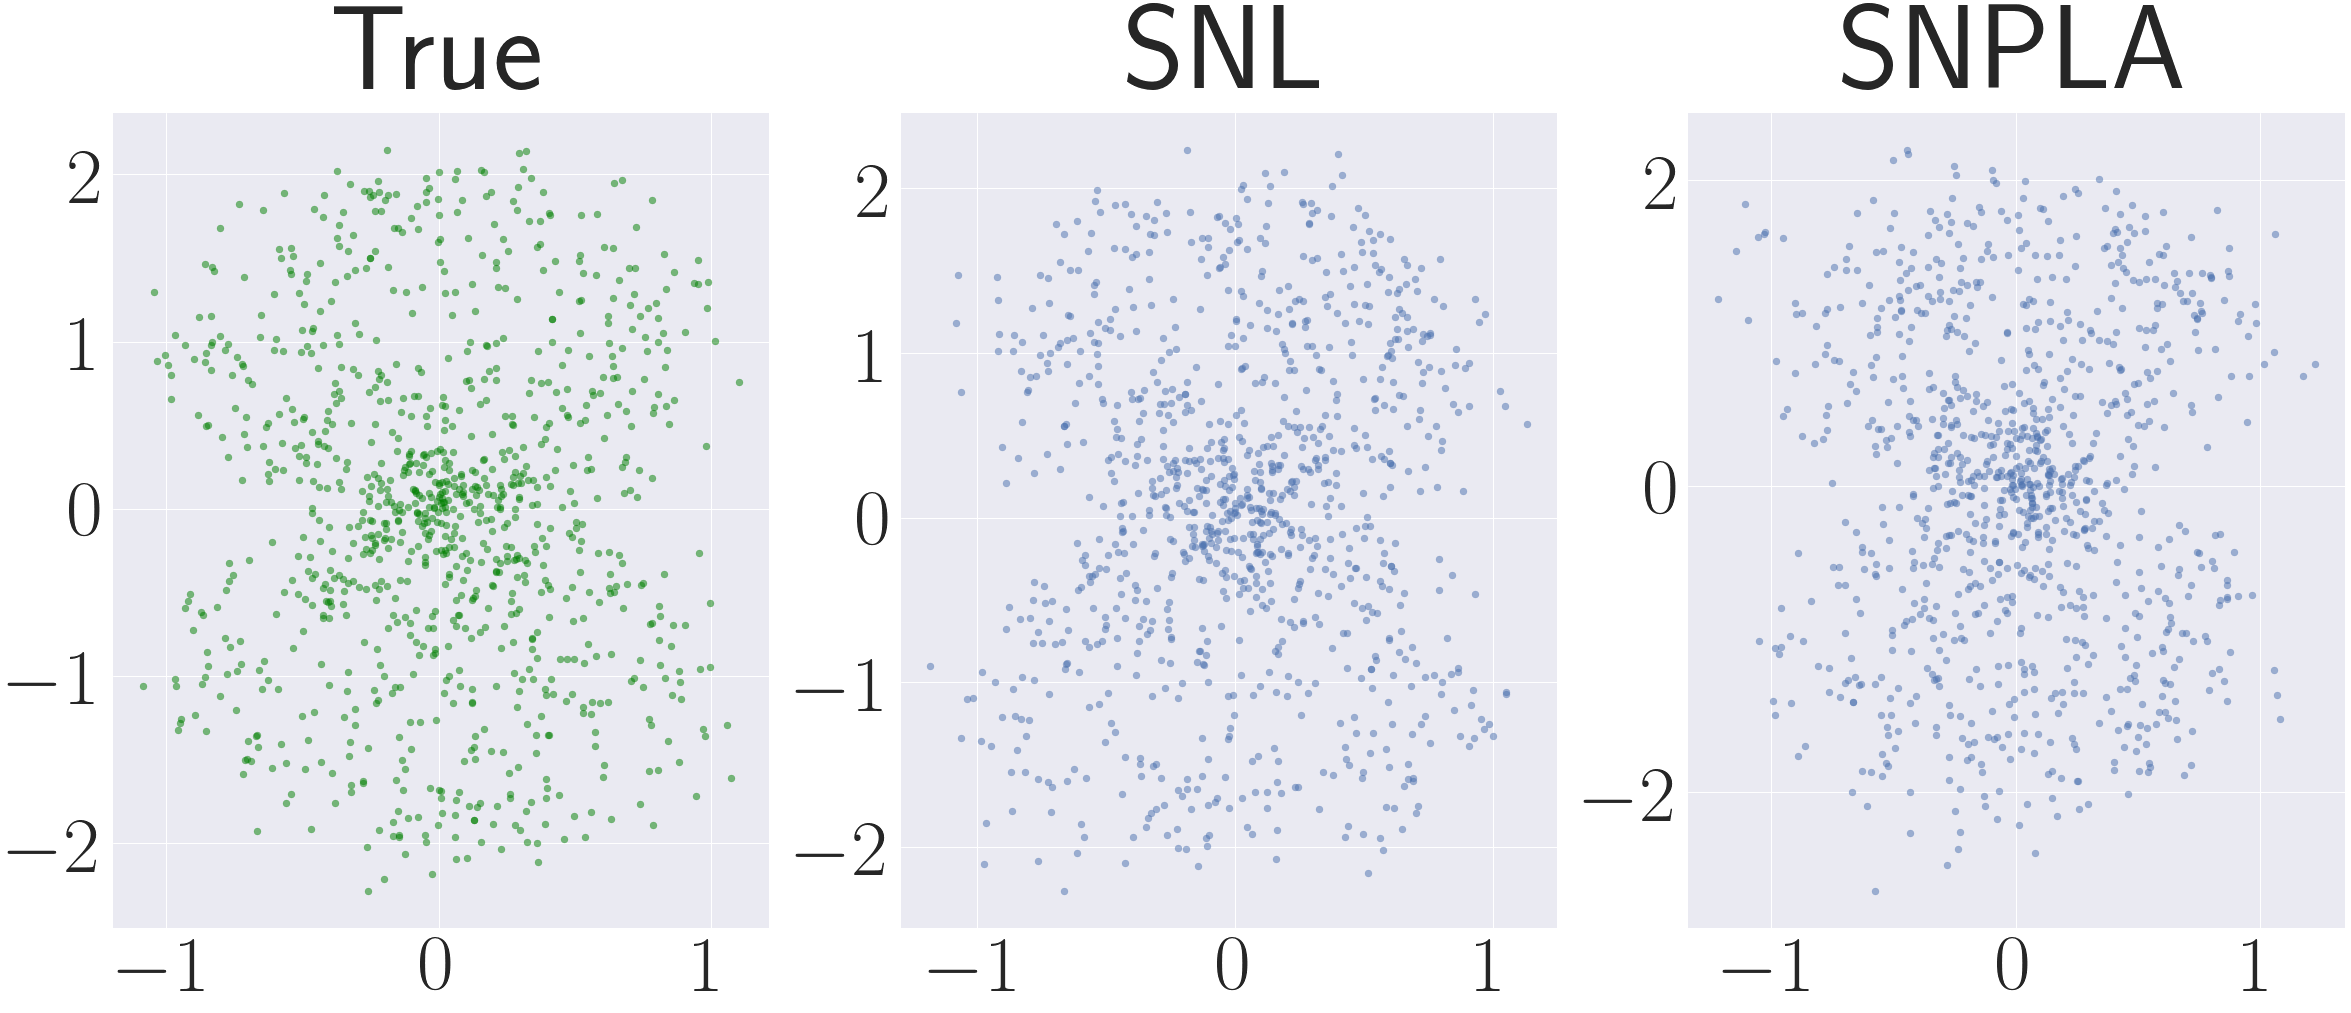

In [41]:
# plotting
data_set = 0

fig = plt.figure(figsize = (40,15))

# frist row 
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.scatter(analytical_post_pred[:,0],analytical_post_pred[:,1],color = "g", alpha = 0.5)
ax2.scatter(snl_post_pred[data_set][:,0],snl_post_pred[data_set][:,1], alpha = 0.5)
ax3.scatter(spa_flow_post_pred[4][data_set][:,0],spa_flow_post_pred[4][data_set][:,1], alpha = 0.5)


ax1.tick_params(axis='both', which='major', labelsize=80)
ax1.tick_params(axis='both', which='minor', labelsize=70)

ax2.tick_params(axis='both', which='major', labelsize=80)
ax2.tick_params(axis='both', which='minor', labelsize=70)

ax3.tick_params(axis='both', which='major', labelsize=80)
ax3.tick_params(axis='both', which='minor', labelsize=70)

ax1.set_title("True",fontsize=120)
ax2.set_title("SNL",fontsize=120)
ax3.set_title("SNPLA",fontsize=120)

plt.savefig("./two_moons/fig/post_pred_samples_" + str(data_set) + "_.pdf",bbox_inches='tight')

